## Project 1 : Earthquakes in Greece in 2018 



### I have found this set http://www.geophysics.geol.uoa.gr/stations/maps/recent.html from the Geophysics Dept. of the University of Athens, Greece. It contains geographical, chronological and earthquake measuring data from 01.01.2018 until today.

In [3]:
import pandas as pd
import matplotlib
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("event_output.tsv", delimiter=" ")
df.head()

,Year,Mo,Dy,Hr,Mn,Sec,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,dz,Unnamed: 49,Unnamed: 50,Np,Unnamed: 52,Na,Gap
0,2018,7,10,15,29,15.91,NaN,37.6361,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,7,10,12,44,45.51,NaN,35.8716,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,7,10,11,51,25.69,NaN,38.5067,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,7,10,5,32,47.32,NaN,38.3658,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,7,10,5,18,19.65,NaN,38.5995,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### A word on cleaning: I got this as a .tsv file straight from the above url, I opened it in pandas and got 55 columns which had 2 main issues: some of them were completely full of NaN values and had to be dropped, whereas some series from the original had split data in 2 columns [eg. on index 0, I got magnitude level in column 15 and on index 1 in column 16] so I had to merge these and drop NaNs]

In [5]:
pd.set_option('display.max_columns', 500)

In [6]:
df.drop(['Unnamed: 6', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 49','Unnamed: 50'], axis=1, inplace=True)

In [7]:
df.drop(['Lat', 'Unnamed: 12', 'Unnamed: 41', 'Unnamed: 42','Unnamed: 43','Unnamed: 52','Na','Gap','Np','dy','dz','dx'], axis=1, inplace=True)

In [8]:
df.drop(['Unnamed: 38', 'Unnamed: 39'], axis=1, inplace=True)

In [9]:
df.drop(['Long', 'Unnamed: 17', 'Unnamed: 19', 'Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23',"Dep"], axis=1, inplace=True)

In [10]:
df ['mag'] = df['Unnamed: 15'].combine_first(df['Unnamed: 16'])

In [11]:
df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [12]:
df ['depth'] = df['Unnamed: 13'].combine_first(df['Unnamed: 14'])

In [13]:
df.drop(['Unnamed: 13', 'Unnamed: 14'], axis=1, inplace=True)

In [14]:
df.drop(['Mag', 'Unnamed: 25','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30', 'Unnamed: 31','Unnamed: 32','Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','RMS'], axis=1, inplace=True)

In [15]:
df.rename(index=str, columns={"Unnamed: 7": "Latitude", "Unnamed: 10": "Longitude"},inplace=True)

In [16]:
df.Mo = df.Mo.astype(str)

In [17]:
df.Mo = df.Mo.replace ({"1": "Jan","2":"Feb","3":"Mar","4":"Apr","5":"May","6":"Jun","7":"Jul"})

In [18]:
df

,Year,Mo,Dy,Hr,Mn,Sec,Latitude,Longitude,mag,depth
0,2018,Jul,10,15,29,15.91,37.6361,23.0872,2.4,10.0
1,2018,Jul,10,12,44,45.51,35.8716,24.2618,2.1,5.0
2,2018,Jul,10,11,51,25.69,38.5067,21.6012,1.9,5.0
3,2018,Jul,10,5,32,47.32,38.3658,21.8209,0.9,12.0
4,2018,Jul,10,5,18,19.65,38.5995,22.8017,2.4,10.0
5,2018,Jul,10,5,16,50.86,38.5072,22.7486,2.2,10.0
6,2018,Jul,10,5,12,58.02,36.5560,23.9036,2.7,10.0
7,2018,Jul,10,3,13,43.21,36.5412,24.0659,2.8,10.0
8,2018,Jul,10,2,18,0.03,42.2046,18.7619,3.4,10.0
9,2018,Jul,10,2,17,26.06,35.3872,23.2067,2.0,10.0


In [19]:
quakes_df = df

In [20]:
quakes_df.to_csv ("quakes.csv",index=False)

### Graph 1: Which was the month with the most earthquakes in Greece in 2018 [up till today] ?



In [21]:
most_quakes_month = quakes_df.Mo.value_counts().sort_values(ascending=True)

In [22]:
most_quakes_month

Jul    285
Feb    523
Mar    577
May    622
Jun    635
Apr    670
Jan    755
Name: Mo, dtype: int64

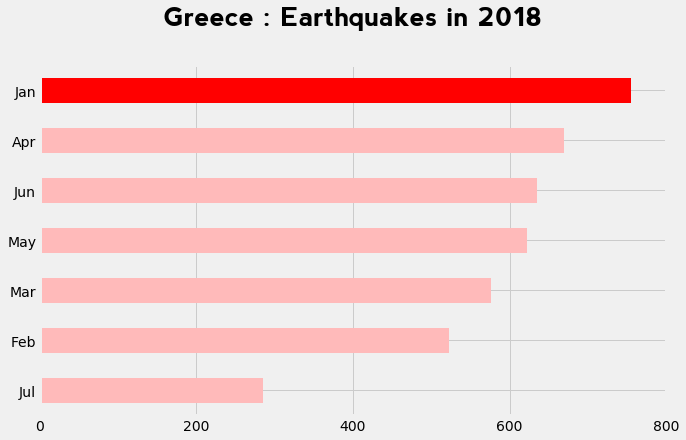

In [23]:
plt.style.use ('fivethirtyeight')
bar_colors = ['#ffbaba','#ffbaba','#ffbaba','#ffbaba','#ffbaba','#ffbaba','#ff0000']
most_quakes = most_quakes_month.plot(kind='barh', color=bar_colors,figsize=(10,6), legend=False)
most_quakes.set_xticks ([0,200,400,600,800])
most_quakes.set_title ("Greece : Earthquakes in 2018", pad = 40)
most_quakes.title.set_fontsize(27)
most_quakes.title.set_fontname("Nevis")

### Graph 2: All quakes in Greece in 2018 per magnitude and depth



In [24]:
df1 = df[['Mo','mag','depth']]

In [27]:
df1.head()

,Mo,mag,depth
0,Jul,2.4,10.0
1,Jul,2.1,5.0
2,Jul,1.9,5.0
3,Jul,0.9,12.0
4,Jul,2.4,10.0


In [26]:
df.dropna().depth

0       10.0
1        5.0
2        5.0
3       12.0
4       10.0
5       10.0
6       10.0
7       10.0
8       10.0
9       10.0
10       5.0
11      10.0
12      19.0
13       5.0
14      10.0
15      72.0
16      10.0
17       9.0
18      10.0
19      10.0
20      10.0
21      10.0
22      10.0
23      25.0
24       5.0
25      10.0
26       5.0
27      10.0
28      10.0
29      11.0
        ... 
4037     5.0
4038    10.0
4039     5.0
4040    10.0
4041    10.0
4042    10.0
4043    10.0
4044    10.0
4045     5.0
4046    10.0
4047     5.0
4048    10.0
4049     5.0
4050     6.0
4051    14.0
4052    10.0
4053    10.0
4054     5.0
4055     5.0
4056    10.0
4057    10.0
4058    10.0
4059    10.0
4060    11.0
4061     5.0
4062    31.0
4063    10.0
4064     5.0
4065    17.0
4066    10.0
Name: depth, Length: 4054, dtype: float64

Text(0.5,1,'Earthquakes in Greece : Magnitude vs. Depth')

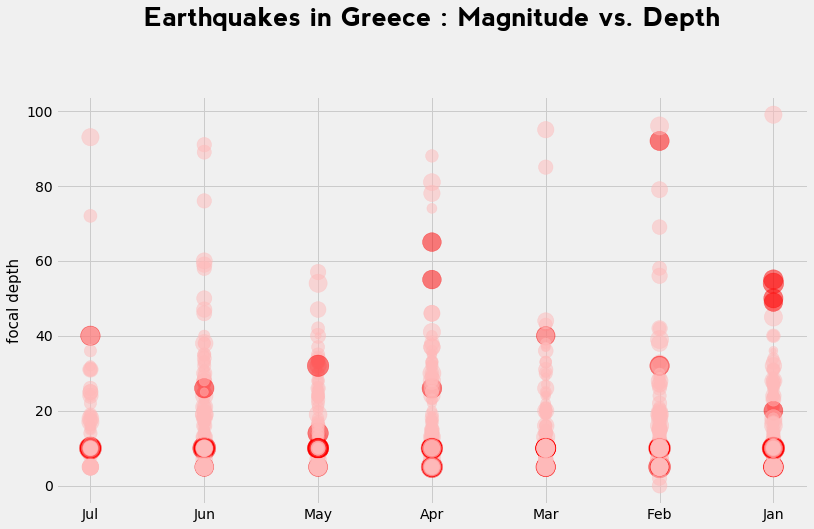

In [33]:
plt.style.use ('fivethirtyeight')
def get_color(mag):
    if mag >= 3.5: 
        return '#ff0000'
    else:
        return '#ffbaba'

bar_colors = [get_color(mag) for mag in df.dropna().mag]
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x=df.dropna().Mo, y=df.dropna().depth, s=100 * df.dropna().mag, color= bar_colors, alpha=0.5)
plt.ylabel('focal depth', fontsize=15)
ax.set_title ("Earthquakes in Greece : Magnitude vs. Depth", pad=70,fontsize=27,fontname="Nevis")


### Graph 3: All quakes in Greece in 2018 on lattitude axis




In [28]:
df2 = df[['Latitude','mag']]

In [29]:
df2.head()

,Latitude,mag
0,37.6361,2.4
1,35.8716,2.1
2,38.5067,1.9
3,38.3658,0.9
4,38.5995,2.4


/Users/nickospi/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x11714b7f0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


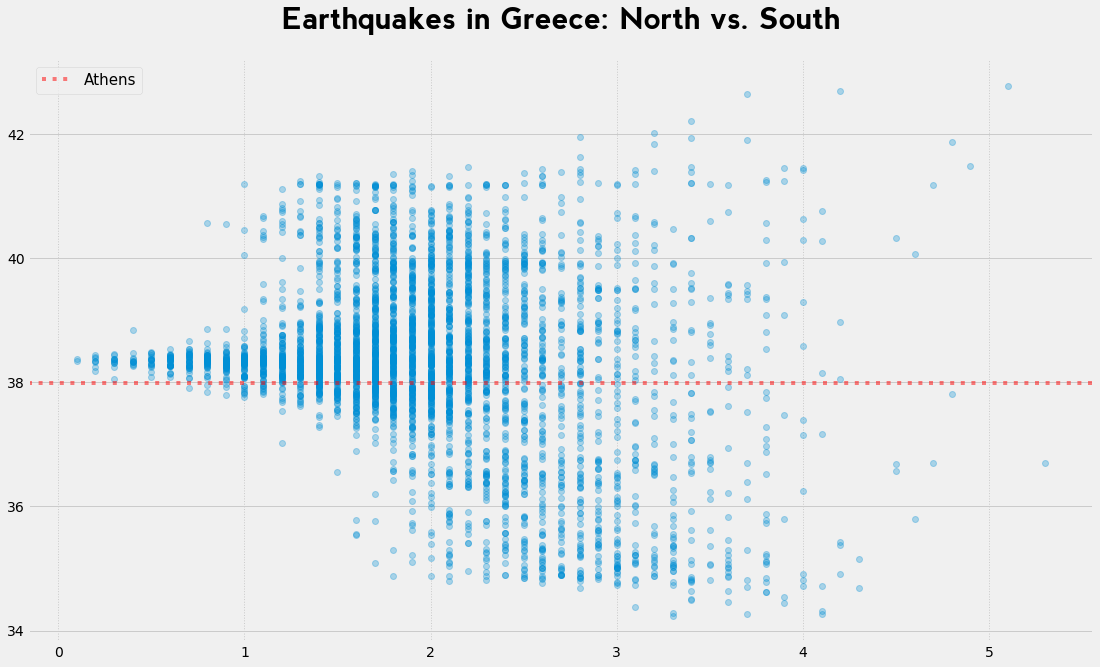

In [393]:
plt.style.use ('fivethirtyeight')
ax = df2.plot(y='Latitude', x='mag',marker='o', linestyle='', figsize=(17,10),label='_nolegend_',alpha=0.3)
ax_Ath = plt.axhline(y=37.9838, color='r', linestyle=':',alpha = 0.5, label = 'Athens')
ax.legend(fontsize=15, loc=2)
ax.set_title ("Earthquakes in Greece: North vs. South", pad = 30)
ax.title.set_fontsize(30)
ax.grid(True, axis = 'x', linestyle =":", linewidth=1)
ax.title.set_fontname("Nevis")
ax.xaxis.label.set_visible(False)


## Nice to have :
    
### - a map showing earthquakes in Greece and focal points/mag
### - a graph with the actual names of the big cities with most quakes in a range (eg. 50 mi)
### - a graph showing how the most quakes that have happened in a minimum timeframe (like a minute or an hour - the df shows quakes per second). Animate that graph.
### - would lile to work more on the legends [the warning in the 3rd one is about the legend]